<a href="https://colab.research.google.com/github/Nikhileswar-Komati/100D_ML/blob/master/Algorithms/MULTI_CLASS_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = datasets.load_iris()
X = data.data
Y = data.target

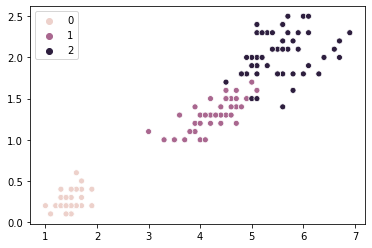

In [3]:
sns.scatterplot(X[:, 2], X[:, 3], hue = Y)

In [4]:
train_X, test_X, train_Y, test_Y = train_test_split(X[:, 2:], Y, random_state = 43, test_size = 0.2)

In [5]:
class Multi_Class_Logistic_Regression:
  def __init__(self, learning_rate = 0.05, n_iterations = 1000):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
  def fit(self, x, y):
    self.thetas = []
    size = x.shape[0]
    self.classes = np.unique(y)
    self.costs = np.zeros(self.n_iterations)
    x = np.insert(x, 0, 1, axis = 1)
    y = y.reshape((size, 1))
    for c in self.classes:
      binary_y = np.where(y == c, 1, 0).reshape((size, 1))
      theta = np.zeros((x.shape[1], 1))
      for epoch in range(self.n_iterations):
        z = np.dot(x, theta)
        h = 1 / (1 + np.exp(-z))
        cost = (((- binary_y) * np.log(h)) - ((1 - binary_y) * np.log(1-h))).mean()
        self.costs[epoch] = cost
        residuals = h - binary_y
        gradients = np.dot(x.T, residuals)
        theta -= self.learning_rate * (gradients / size)
      self.thetas.append(theta)
    # print(residuals.shape, gradients.shape)
    # print(self.thetas)
    return self
  def predict(self, x):
    size = x.shape[0]
    x = np.insert(x, 0, 1, axis = 1)
    preds = [np.argmax([1 / (1 + np.exp(-(np.dot(ele, theta)))) for theta in self.thetas]) for ele in x]
    #print(preds)
    return np.array([self.classes[pred] for pred in preds])





In [6]:
cls = Multi_Class_Logistic_Regression(learning_rate=0.05, n_iterations=5000)
his = cls.fit(train_X, train_Y)
y_pred = his.predict(test_X)

from sklearn.metrics import  accuracy_score
print(accuracy_score(test_Y, y_pred))

0.9666666666666667


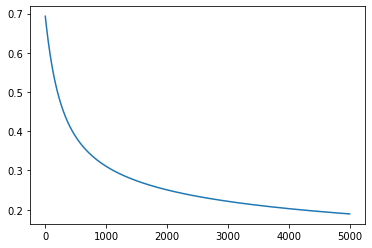

In [7]:
costs = np.array(his.costs)
sns.lineplot(list(range(costs.shape[0])), costs)

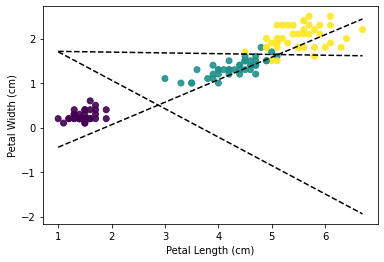

In [8]:
plt.scatter(train_X[:,0], train_X[:, 1], c = train_Y, alpha=0.9)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
for theta in his.thetas:
    j = np.array([train_X[:, 0].min(), train_X[:, 0].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

In [11]:
def fit(x, y, max_iter=5000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

In [12]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    return [classes[p] for p in preds]


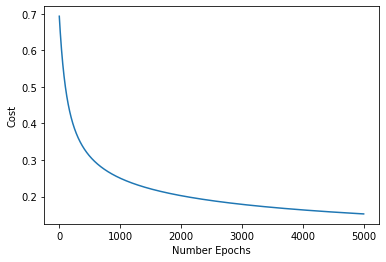

In [13]:
thetas, classes, costs = fit(train_X, train_Y)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');

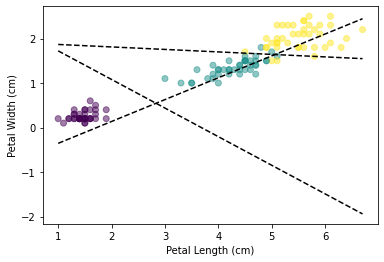

In [14]:
plt.scatter(train_X[:,0], train_X[:, 1], c = train_Y, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
for theta in thetas:
    j = np.array([train_X[:, 0].min(), train_X[:, 0].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

In [15]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

print(f"Train Accuracy: {score(classes, thetas,train_X, train_Y):.3f}")
print(f"Test Accuracy: {score(classes, thetas, test_X, test_Y):.3f}")

Train Accuracy: 0.933
Test Accuracy: 0.967


In [16]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 43, test_size = 0.2)

In [17]:
cls = Multi_Class_Logistic_Regression(learning_rate=0.01, n_iterations=5000)
his = cls.fit(train_X, train_Y)
y_pred = his.predict(test_X)

from sklearn.metrics import  accuracy_score
print(accuracy_score(test_Y, y_pred))

1.0


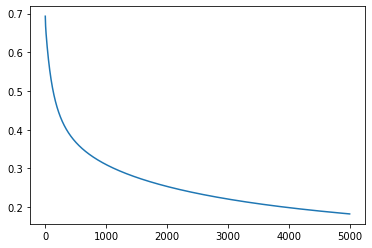

In [18]:
costs = np.array(his.costs)
sns.lineplot(list(range(costs.shape[0])), costs)